<center><img src='./img/cs-logo.png' width=200></center>

<hr style=" border:none; height:3px;">
<h1>
<center>Influence Maximisation - LT and IC Models </center>
</h1>
<font  size="3" color='#91053d'>
<center >
nacera.seghouani@centralesupelec.fr 
</center>
</font>   
<hr style=" border:none; height:3px;">

#####  Introduction (PLEASE READ ME)


<p align="justify">
<font size="3">
The purpose of this lab is to implement diffusion models   basic **Linear Threshold (LT)** and  **Independant Cascade (IC)** models using networkx Python package. The graph could be weighted  using for each edge (u,v) 1/d_v as a weight or For nodes u,v, u has a total probability of 1 − (1 −p) of activating v (for p = 1% and 10%). More precisely:
<ol>
<li>Implement two functions ic and lt where the inputs are (G, S) and the output is the set of infected nodes.  </li>
<li> S (budget k) could be computed randomly, using the highest degrees,  and other measures such as betweeness centrality. Compare the different heuristics  results on some graphs (curves according to the number of iteration a  </li>
<li> Implement Greedy algorithm and compare the results on graphs to the different heuristics</li> 
</ol>
</font>
</p>




In [66]:
!pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot

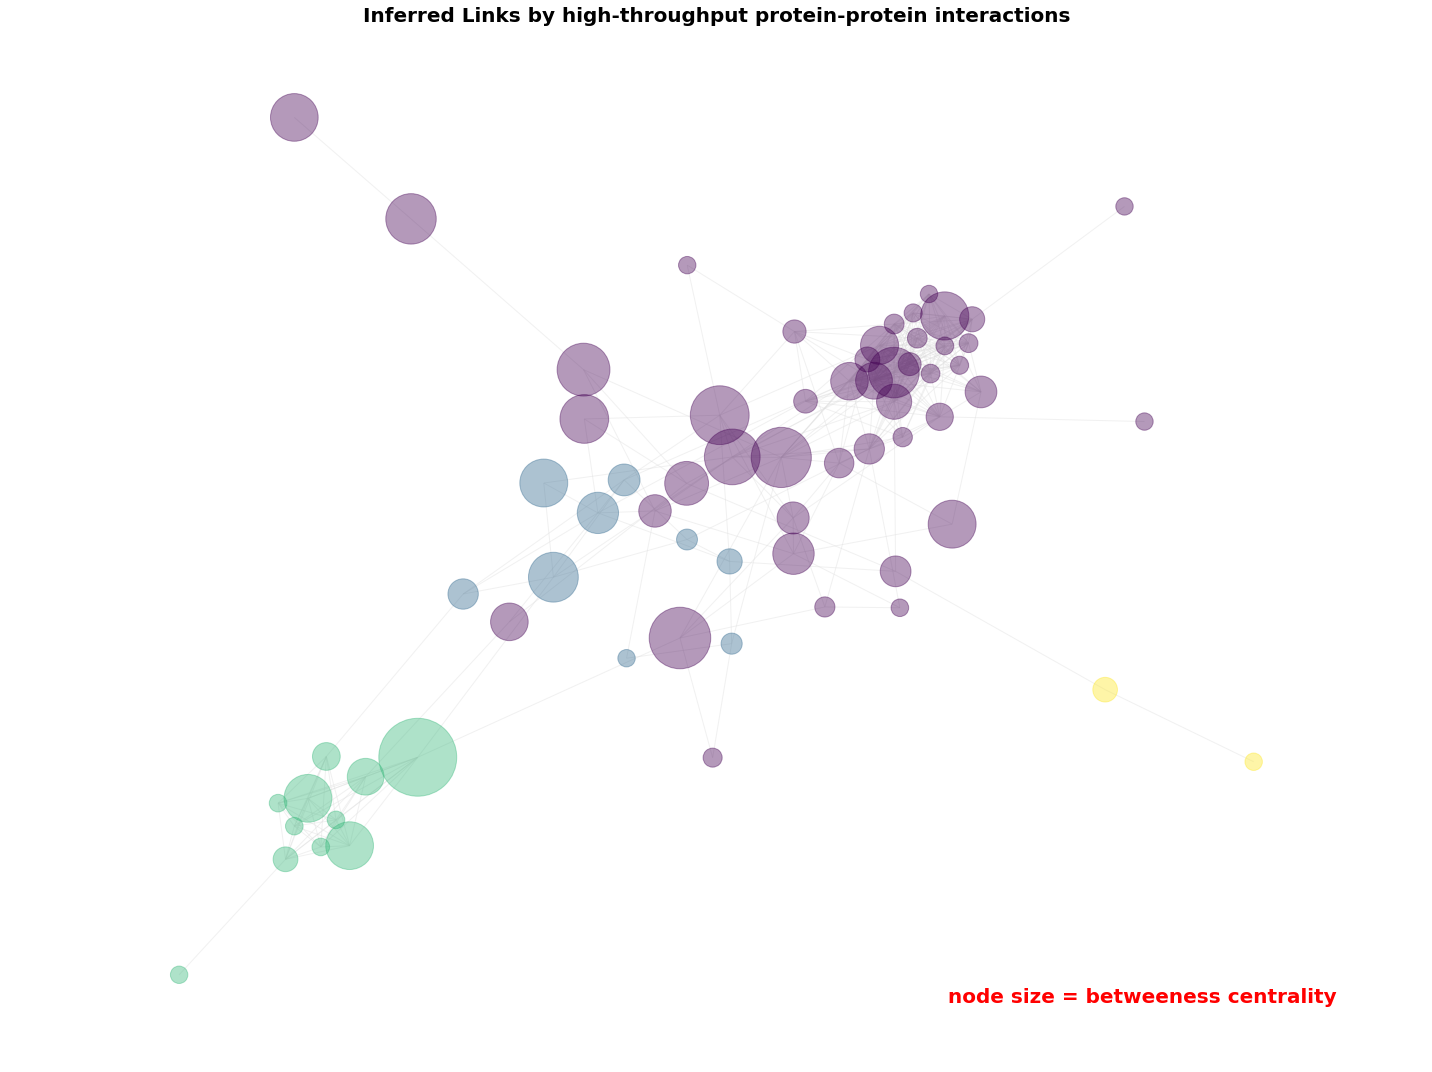

In [68]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Inferred Links by high-throughput protein-protein interactions
# from https://www.inetbio.org/wormnet/downloadnetwork.php
G = nx.read_edgelist("HS-HT.txt", nodetype=str, data=(("Type", str),))

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Inferred Links by high-throughput protein-protein interactions", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [71]:
# Model Selection
model = ep.ThresholdModel(G)

# Model Configuration
config = mc.Configuration()

config.add_model_parameter("fraction_infected", 0.1)

threshold = 0.3
for i in G.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation
iterations = model.iteration_bunch(30)
trends = model.build_trends(iterations)

output_notebook() # show bokeh in notebook
viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

In [73]:
# Model Selection
model2 = ep.IndependentCascadesModel(G)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter("fraction_infected", 0.1)

threshold = 0.3
for i in G.nodes():
    config.add_node_configuration("threshold", i, threshold)

model2.set_initial_status(config)

# Simulation
iterations2 = model2.iteration_bunch(30)
trends2 = model2.build_trends(iterations2)

output_notebook() # show bokeh in notebook
viz2 = DiffusionTrend(model2, trends2)
p2 = viz2.plot(width=400, height=400)
show(p2)

In [74]:
vm = MultiPlot()
vm.add_plot(p)
vm.add_plot(p2)
m = vm.plot()
show(m)